In [390]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
import re
pd.set_option("display.max_columns",None)
warnings.filterwarnings("ignore")

In [391]:
data2 = pd.read_csv("data/house_cleaned.csv")
data2.head()

,property_name,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating
0,5 Bedroom House for sale in Sector 70A Gurgaon,house,bptp visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,3+,servant room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5 Bedroom House for sale in Sector 21A Faridabad,house,independent,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,2,"store room,pooja room,servant room","Sector 21A Faridabad, Gurgaon, Haryana",2.0,NaN,5 to 10 Year Old,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",NaN
2,10 Bedroom House for sale in Sushant Lok Phase 1,house,independent,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,3+,servant room,"Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,0 to 1 Year Old,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,21 Bedroom House for sale in Sector 54 Gurgaon,house,independent,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,servant room,"Sector 54 Gurgaon, Gurgaon, Haryana",5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...","['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,12 Bedroom House for sale in Sushant Lok Phase 1,house,independent,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,3+,others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5.0,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...","['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [392]:
data2.shape

(964, 20)

In [393]:
data = data2[["price", "price_per_sqft", "area", "areaWithType", "bedRoom", "bathroom", "additionalRoom", "facing","rating"]]

In [394]:
data.head()

,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,additionalRoom,facing,rating
0,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,servant room,North-East,"['Environment5 out of 5', 'Lifestyle4 out of 5..."
1,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,"store room,pooja room,servant room",NaN,NaN
2,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,servant room,West,"['Environment5 out of 5', 'Lifestyle5 out of 5..."
3,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,servant room,North,"['Environment4 out of 5', 'Lifestyle5 out of 5..."
4,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,others,West,"['Environment5 out of 5', 'Lifestyle5 out of 5..."


In [395]:
data.describe()

,price,price_per_sqft,area,bedRoom,bathroom
count,945.000000,945.000000,9.450000e+02,964.000000,964.000000
mean,4.911069,28251.213757,1.055610e+04,5.117220,4.825726
std,4.651008,42849.177326,2.359139e+05,3.253843,3.350535
min,0.070000,2.000000,4.500000e+01,1.000000,1.000000
25%,1.200000,10085.000000,9.500000e+02,3.000000,3.000000
50%,3.600000,19231.000000,1.809000e+03,4.000000,4.000000
75%,7.000000,30247.000000,3.191000e+03,6.000000,6.000000
max,31.500000,600000.000000,7.250000e+06,36.000000,36.000000


In [396]:
data.dtypes

,0
price,float64
price_per_sqft,float64
area,float64
areaWithType,object
bedRoom,int64
bathroom,int64
additionalRoom,object
facing,object
rating,object


In [397]:
data.isnull().sum()

,0
price,19
price_per_sqft,19
area,19
areaWithType,0
bedRoom,0
bathroom,0
additionalRoom,0
facing,303
rating,121


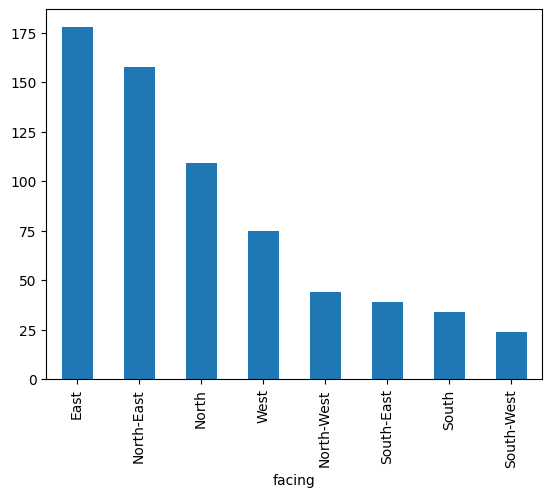

In [398]:
data["facing"].value_counts().plot.bar();

In [399]:
data['facing'].fillna(data['facing'].mode()[0], inplace=True)

In [400]:
data["facing"].isnull().sum()

0

In [401]:
data['plot_area_sqft'] = data['areaWithType'].apply(lambda x: re.findall(r'\d+', x)[0])
data['plot_area_sqft'] = pd.to_numeric(data['plot_area_sqft'])

In [402]:
data.head()

,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,additionalRoom,facing,rating,plot_area_sqft
0,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,servant room,North-East,"['Environment5 out of 5', 'Lifestyle4 out of 5...",290
1,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,"store room,pooja room,servant room",East,NaN,539
2,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,servant room,West,"['Environment5 out of 5', 'Lifestyle5 out of 5...",61
3,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,servant room,North,"['Environment4 out of 5', 'Lifestyle5 out of 5...",129
4,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,others,West,"['Environment5 out of 5', 'Lifestyle5 out of 5...",62


In [403]:
def extract_avg_rating(rating):
    if pd.isna(rating) or rating == "NaN":
        return None
    ratings = re.findall(r'(\d) out of 5', rating)
    if ratings:
        return sum(int(r) for r in ratings) / len(ratings)

In [404]:
data['average_rating'] = data['rating'].apply(extract_avg_rating)

In [405]:
data.head()

,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,additionalRoom,facing,rating,plot_area_sqft,average_rating
0,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5,4,servant room,North-East,"['Environment5 out of 5', 'Lifestyle4 out of 5...",290,4.25
1,5.70,105751.0,539.0,Plot area 539(50.07 sq.m.),5,4,"store room,pooja room,servant room",East,NaN,539,NaN
2,2.10,38251.0,549.0,Plot area 61(51 sq.m.),10,10,servant room,West,"['Environment5 out of 5', 'Lifestyle5 out of 5...",61,5.00
3,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,servant room,North,"['Environment4 out of 5', 'Lifestyle5 out of 5...",129,4.25
4,3.00,53763.0,558.0,Plot area 62(51.84 sq.m.),12,12,others,West,"['Environment5 out of 5', 'Lifestyle5 out of 5...",62,5.00


In [406]:

def extract_additional_rooms(rooms):
    room_types = ['servant room', 'store room', 'pooja room', 'study room', 'others']
    rooms_ = [1 if room in room_types else 0 for room in rooms.split(",")]
    return rooms_[0]

In [407]:
data["additionalRoom"] = data["additionalRoom"].apply(extract_additional_rooms)

In [408]:
data.drop(["areaWithType", "facing", "rating"], axis=1, inplace=True)

In [409]:
data.head()

,price,price_per_sqft,area,bedRoom,bathroom,additionalRoom,plot_area_sqft,average_rating
0,5.25,20115.0,2610.0,5,4,1,290,4.25
1,5.70,105751.0,539.0,5,4,1,539,NaN
2,2.10,38251.0,549.0,10,10,1,61,5.00
3,5.00,43066.0,1161.0,21,21,1,129,4.25
4,3.00,53763.0,558.0,12,12,1,62,5.00


In [410]:
for col in data.columns:
    data[col].fillna(data[col].median(), inplace=True)

In [411]:
data.isnull().sum().sum()

0

In [412]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column < lower_bound) | (column > upper_bound)]

price_outliers = detect_outliers_iqr(data['price'])

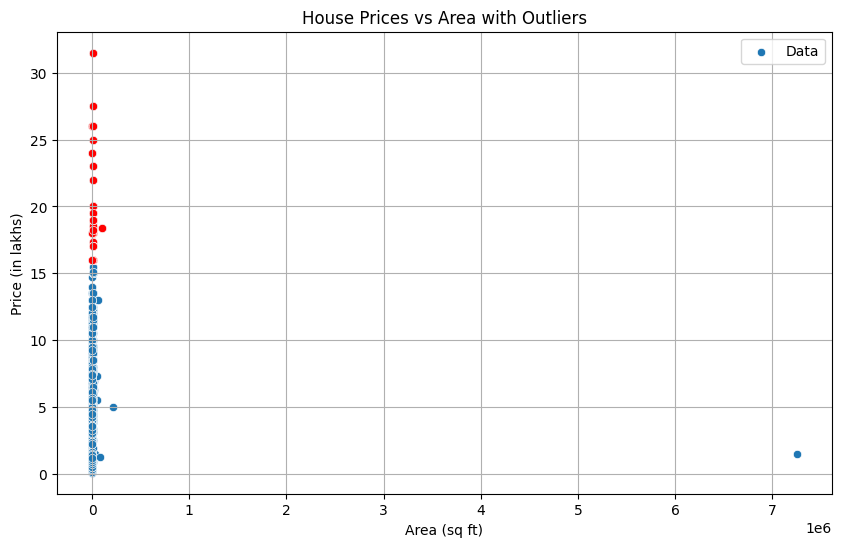

In [413]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['area'], y=data['price'], label='Data')
sns.scatterplot(x=data.loc[price_outliers.index, 'area'], y=price_outliers, color='red')
plt.title('House Prices vs Area with Outliers')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (in lakhs)')
plt.legend()
plt.grid()
plt.show()

In [414]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [415]:
cleaned_data = remove_outliers(data, "price")

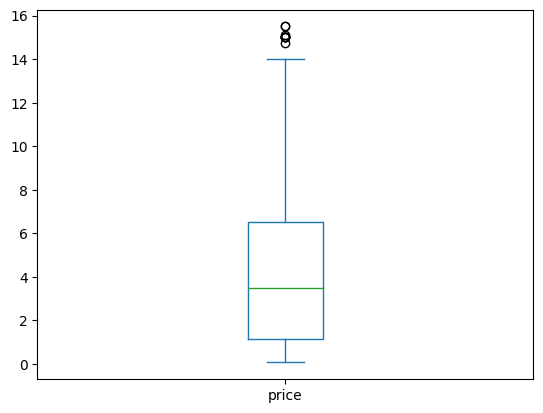

In [416]:
cleaned_data.price.plot.box();

In [417]:
cleaned_data.head()

,price,price_per_sqft,area,bedRoom,bathroom,additionalRoom,plot_area_sqft,average_rating
0,5.25,20115.0,2610.0,5,4,1,290,4.25
1,5.70,105751.0,539.0,5,4,1,539,4.50
2,2.10,38251.0,549.0,10,10,1,61,5.00
3,5.00,43066.0,1161.0,21,21,1,129,4.25
4,3.00,53763.0,558.0,12,12,1,62,5.00


In [418]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
y = cleaned_data.iloc[:,0]
X = cleaned_data.iloc[:,1:]
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation R^2 Score: {best_score}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation R^2 Score: 0.9203440437760989


In [419]:
best_model = RandomForestRegressor(**best_params)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt')

In [420]:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)


print(f'Best Model Mean Squared Error: {mse_best}')
print(f'Best Model R2 Score: {r2_best}')

Best Model Mean Squared Error: 0.8356639740143363
Best Model R2 Score: 0.9305371728006062


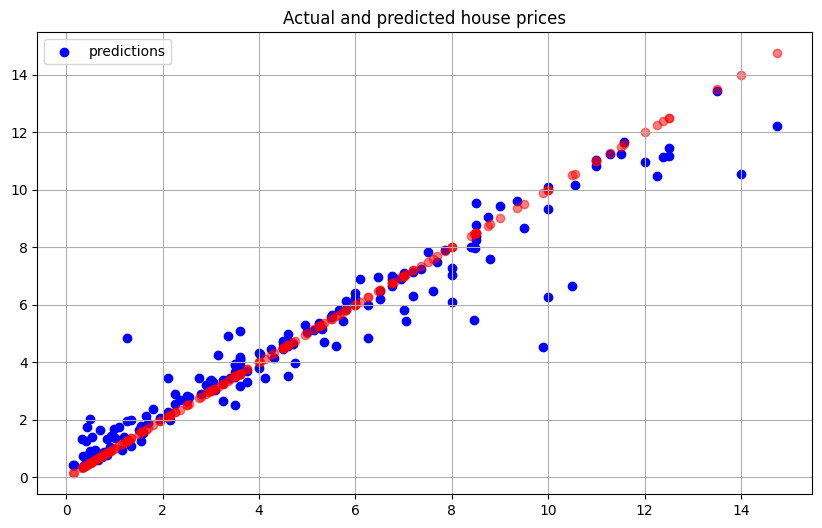

In [421]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best, color="blue", label="predictions")
plt.scatter(y_test, y_test, color="red", alpha=0.5)
plt.title("Actual and predicted house prices")
plt.legend()
plt.grid()
plt.show()

In [423]:
best_scores = {"Best Model Mean Squared Error": [round((mse_best*100),3)],"Best Model R2 Score":round((r2_best*100),3)}
best_score_df = pd.DataFrame(best_scores)

In [424]:
best_score_df

,Best Model Mean Squared Error,Best Model R2 Score
0,83.566,93.054


In [425]:
import joblib


models = {
    'scaler': sc,
    'model': best_model
}

#save the model
joblib.dump(models, 'model_and_scaler.pkl')

['model_and_scaler.pkl']

In [426]:

class House_Price_Class:

    def __init__(self, data):
        self.data2 = data

    def data_preprocessing(self):
        data = self.data2[["price", "price_per_sqft", "area", "areaWithType", "bedRoom", "bathroom", "additionalRoom", "facing","rating"]]
        data['facing'].fillna(data['facing'].mode()[0])
        data['plot_area_sqft'] = data['areaWithType'].apply(lambda x: re.findall(r'\d+', x)[0])
        data['plot_area_sqft'] = pd.to_numeric(data['plot_area_sqft'])
        data['average_rating'] = data['rating'].apply(self.extract_avg_rating)
        data["additionalRoom"] = data["additionalRoom"].apply(self.extract_additional_rooms)
        data.drop(["areaWithType", "facing", "rating"], axis=1, inplace=True)

        for col in data.columns:
            data[col].fillna(data[col].median(), inplace=True)

        def remove_outliers(df, column):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

        cleaned_data = remove_outliers(data, "price")
        return cleaned_data


    def extract_avg_rating(self, rating):
        if pd.isna(rating) or rating == "NaN":
            return None
        ratings = re.findall(r'(\d) out of 5', rating)
        if ratings:
            return sum(int(r) for r in ratings) / len(ratings)

    def extract_additional_rooms(self, rooms):
        room_types = ['servant room', 'store room', 'pooja room', 'study room', 'others']
        rooms_ = [1 if room in room_types else 0 for room in rooms.split(",")]
        return rooms_[0]

    def model_selection_and_prediction(self, X_train, X_test, y_train, y_test):
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
        }

        grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

        grid_search.fit(X_train, y_train)

        best_params = grid_search.best_params_

        best_model = RandomForestRegressor(**best_params)
        best_model.fit(X_train, y_train)

        y_pred_best = best_model.predict(X_test)

        mse_best = mean_squared_error(y_test, y_pred_best)
        r2_best = r2_score(y_test, y_pred_best)

        print(f'Best Model Mean Squared Error: {mse_best}')
        print(f'Best Model R2 Score: {r2_best}')

        return r2_best

if __name__ == "__main__":
    data2 = pd.read_csv("house_cleaned.csv")
    House_Price_Class_obj = House_Price_Class(data2)
    cleaned_data = House_Price_Class_obj.data_preprocessing()
    y = cleaned_data.iloc[:,0]
    X = cleaned_data.iloc[:,1:]
    sc = StandardScaler()
    X = sc.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    r2_best = House_Price_Class_obj.model_selection_and_prediction(X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Model Mean Squared Error: 0.7892384260969233
Best Model R2 Score: 0.9343961997694643


**Thank You**